# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [6]:
# The goal of this analysis is to detect and measure the impact of several factors, including make, model, year, mileage, condition, location, and extra features, on the car's pricing using statistical and machine learning techniques.
# Regression analysis can be used to reframe the task as one in which the objective is to forecast the price of a used car based on its qualities.
# With this a determination can be made regarding which aspects are most important in deciding a used car's pricing by creating a predictive model, giving the dealership practical insights into what features used car buyers value most.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [7]:
# To gain familiarity with the dataset, we can dive deep into the different features and data values
# in an effort to understand where they're may be missing data. As well as understanding the importance of certain features
# which can help create determinations as to how these features can be used in our model to provide accurate results.
# For cleaning the dataset, I will focus on looking at the first few rows of the data set through df.head() and looking at
# the overal shape of the data through df.info().

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [9]:
df = pd.read_csv('vehicles.csv')

In [10]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25815 entries, 0 to 25814
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            25815 non-null  int64  
 1   region        25815 non-null  object 
 2   price         25815 non-null  int64  
 3   year          25651 non-null  float64
 4   manufacturer  24676 non-null  object 
 5   model         25433 non-null  object 
 6   condition     15139 non-null  object 
 7   cylinders     15371 non-null  object 
 8   fuel          25631 non-null  object 
 9   odometer      25539 non-null  float64
 10  title_status  25406 non-null  object 
 11  transmission  25710 non-null  object 
 12  VIN           16104 non-null  object 
 13  drive         18201 non-null  object 
 14  size          6757 non-null   object 
 15  type          20137 non-null  object 
 16  paint_color   18818 non-null  object 
 17  state         25814 non-null  object 
dtypes: float64(2), int64(2), o

In [15]:
df = df.dropna()

df = df.drop(columns=['id', 'VIN', 'size'])

# Feature Engineering: Create new features
df['age'] = 2024 - df['year']
df['mileage_per_year'] = df['odometer'] / df['age']

# Drop the original year column
df = df.drop(columns=['year'])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 126 to 25775
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            1938 non-null   object 
 1   price             1938 non-null   int64  
 2   manufacturer      1938 non-null   object 
 3   model             1938 non-null   object 
 4   condition         1938 non-null   object 
 5   cylinders         1938 non-null   object 
 6   fuel              1938 non-null   object 
 7   odometer          1938 non-null   float64
 8   title_status      1938 non-null   object 
 9   transmission      1938 non-null   object 
 10  drive             1938 non-null   object 
 11  type              1938 non-null   object 
 12  paint_color       1938 non-null   object 
 13  state             1938 non-null   object 
 14  age               1938 non-null   float64
 15  mileage_per_year  1938 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory u

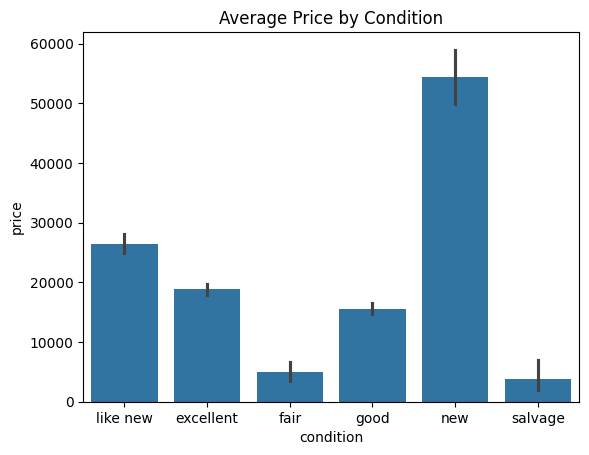

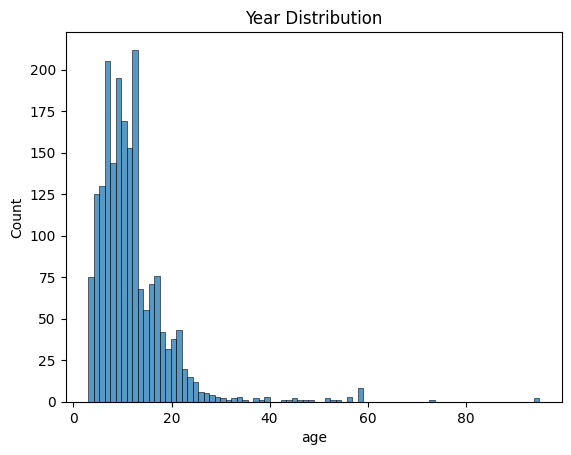

In [17]:

# Create a bar chart of average price by condition
sns.barplot(data=df, x="condition", y="price").set_title("Average Price by Condition")
plt.show()

# Create a histogram of year
sns.histplot(data=df, x="age").set_title("Year Distribution")
plt.show()


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [18]:

# Creating columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('price')  # Exclude the target variable

# Column transformer that uses OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


#Pipelines for linear and random forest models
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

X = df.drop(columns=['price'])
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Linear Regression model
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
print(f'Linear Regression MSE: {linear_mse}')

# Train and evaluate Random Forest model
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse}')

# Cross-validation for both models
linear_cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression CV MSE: {-linear_cv_scores.mean()}')
print(f'Random Forest CV MSE: {-rf_cv_scores.mean()}')

Linear Regression MSE: 56811846.19901243
Random Forest MSE: 22351321.926549353
Linear Regression CV MSE: 97066793.49162775
Random Forest CV MSE: 61849952.90510728


In [19]:
linear_rmse = np.sqrt(linear_mse)
rf_rmse = np.sqrt(rf_mse)

print(f'Linear Regression RMSE: {linear_rmse}')
print(f'Random Forest RMSE: {rf_rmse}')

print(f'Linear Regression CV RMSE: {np.sqrt(-linear_cv_scores.mean())}')
print(f'Random Forest CV RMSE: {np.sqrt(-rf_cv_scores.mean())}')


Linear Regression RMSE: 7537.363345296048
Random Forest RMSE: 4727.718469468054
Linear Regression CV RMSE: 9852.248144034322
Random Forest CV RMSE: 7864.474102259303


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [22]:
# Setting up and running GridSearchCV for linear regression model
p_grid = {
    'regressor__fit_intercept': [True, False],
}

lr_grid_search = GridSearchCV(estimator=linear_model, param_grid=p_grid,
                              cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
# Perform grid search
lr_grid_search.fit(X_train, y_train)

# Get the best parameters and the best MSE score
best_params = lr_grid_search.best_params_
best_mse = -lr_grid_search.best_score_

print("Best Parameters:", best_params)
print("Best MSE:", best_mse)

# Evaluate the best model on the test set
best_lr_model = lr_grid_search.best_estimator_
best_lr_predictions = best_lr_model.predict(X_test)
best_lr_mse = mean_squared_error(y_test, best_lr_predictions)
print(f'Best Linear Regression MSE on Test Set: {best_lr_mse}')
print(f'Best Linear Regression RMSE on Test Set: {np.sqrt(best_lr_mse)}')


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'regressor__fit_intercept': True}
Best MSE: 91541130.45657547
Best Linear Regression MSE on Test Set: 56811846.19901243
Best Linear Regression RMSE on Test Set: 7537.363345296048


In [23]:
# Setting up and running GridSearchCV for random forest model
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with fewer folds
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Perform grid search
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and the best MSE score
best_params = rf_grid_search.best_params_
best_mse = -rf_grid_search.best_score_

print("Best Parameters:", best_params)
print("Best MSE:", best_mse)

# Evaluate the best model on the test set
best_rf_model = rf_grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
print(f'Best Random Forest MSE on Test Set: {best_rf_mse}')
print(f'Best Random Forest RMSE on Test Set: {np.sqrt(best_rf_mse)}')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best MSE: 46054677.23281088
Best Random Forest MSE on Test Set: 21682178.348943327
Best Random Forest RMSE on Test Set: 4656.4126051009835


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Top 20 Positive Coefficients
                            Feature  Coefficient
759                cat__fuel_diesel  5278.133420
757      cat__cylinders_8 cylinders  3820.808645
771                  cat__drive_4wd  3329.406343
800                   cat__state_al  3000.664620
749         cat__condition_like new  2639.419630
6            cat__region_birmingham  2577.055440
5           cat__region_bakersfield  2247.953067
799                   cat__state_ak  2243.257344
764         cat__title_status_clean  2142.672621
3    cat__region_anchorage / mat-su  2136.726156
9          cat__region_fayetteville  2094.444928
784                 cat__type_truck  2031.597997
803                   cat__state_ca  1813.637255
802                   cat__state_az  1638.889860
58        cat__manufacturer_porsche  1552.336118
40           cat__manufacturer_ford  1510.586232
364             cat__model_f350 drw  1491.386262
59            cat__manufacturer_ram  1292.184925
795            cat__paint_color_red  118

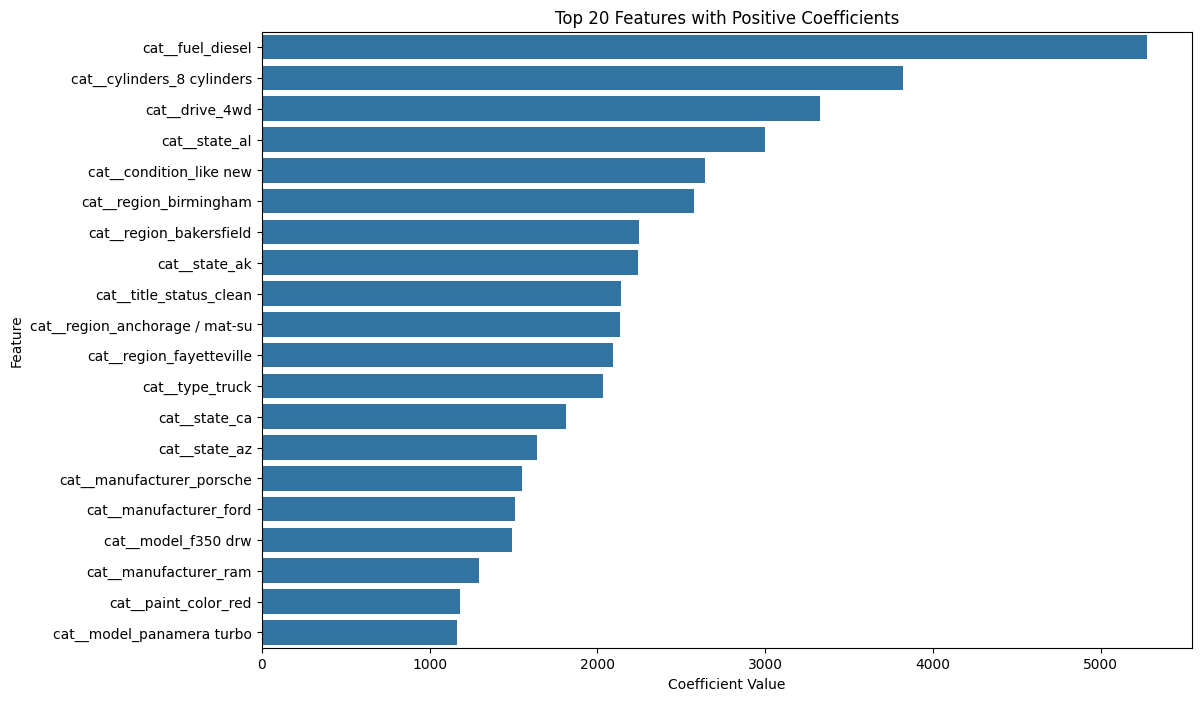

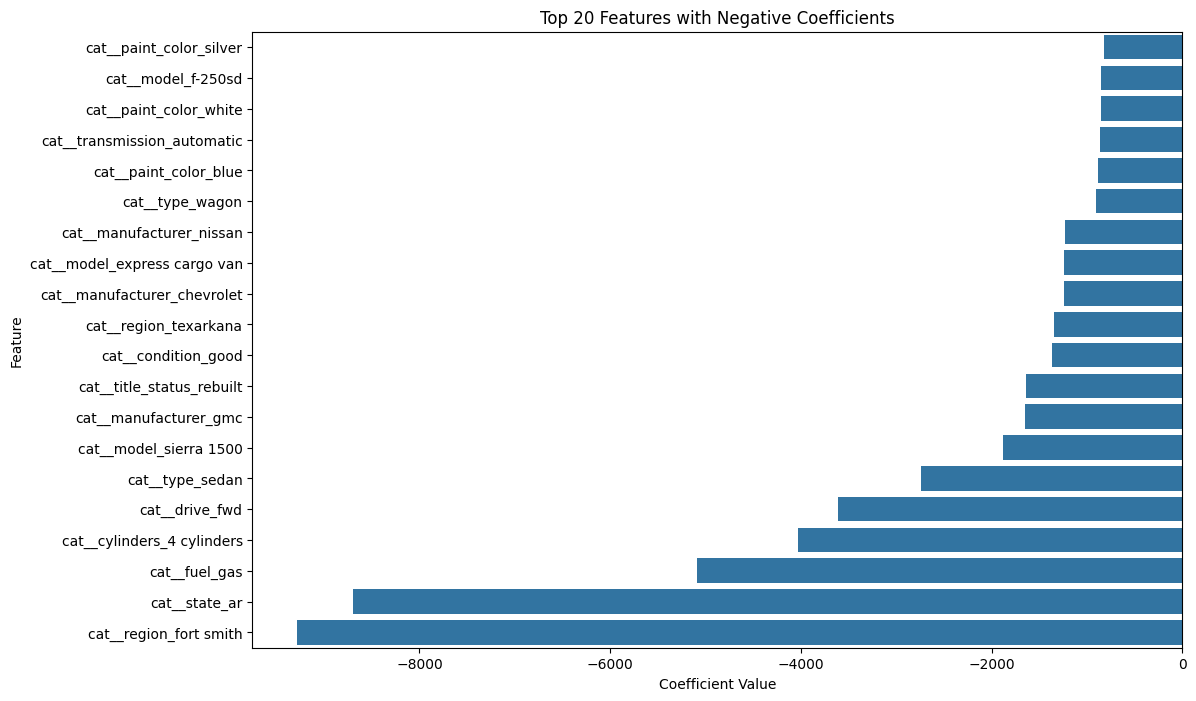

In [24]:
#Extract feature names from the preprocessor
feature_names = best_lr_model.named_steps['preprocessor'].get_feature_names_out()

# Extract coefficients from the linear regression model
coefficients = best_lr_model.named_steps['regressor'].coef_

# Create a DataFrame to hold feature names and their coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient values in descending order
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the top 20 features with the highest positive and negative coefficients
print("Top 20 Positive Coefficients")
print(coefficients_df.head(20))  # Most positive impact on price
print("\nTop 20 Negative Coefficients")
print(coefficients_df.tail(20))  # Most negative impact on price

# Plot the top 20 positive coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df.head(20))
plt.title('Top 20 Features with Positive Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Plot the top 20 negative coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df.tail(20))
plt.title('Top 20 Features with Negative Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

                          Feature  Importance
0                   num__odometer    0.196915
1                        num__age    0.134749
12         cat__region_fort smith    0.078373
771                cat__drive_4wd    0.069761
784               cat__type_truck    0.057063
759              cat__fuel_diesel    0.045578
754    cat__cylinders_4 cylinders    0.044206
772                cat__drive_fwd    0.038458
761                 cat__fuel_gas    0.025732
801                 cat__state_ar    0.023753
2           num__mileage_per_year    0.023437
757    cat__cylinders_8 cylinders    0.018763
364           cat__model_f350 drw    0.015940
514     cat__model_panamera turbo    0.011725
113         cat__model_360 modena    0.008583
186          cat__model_camaro ss    0.007358
316  cat__model_express cargo van    0.007350
38      cat__manufacturer_ferrari    0.006773
28         cat__region_tuscaloosa    0.006294
789        cat__paint_color_brown    0.005436


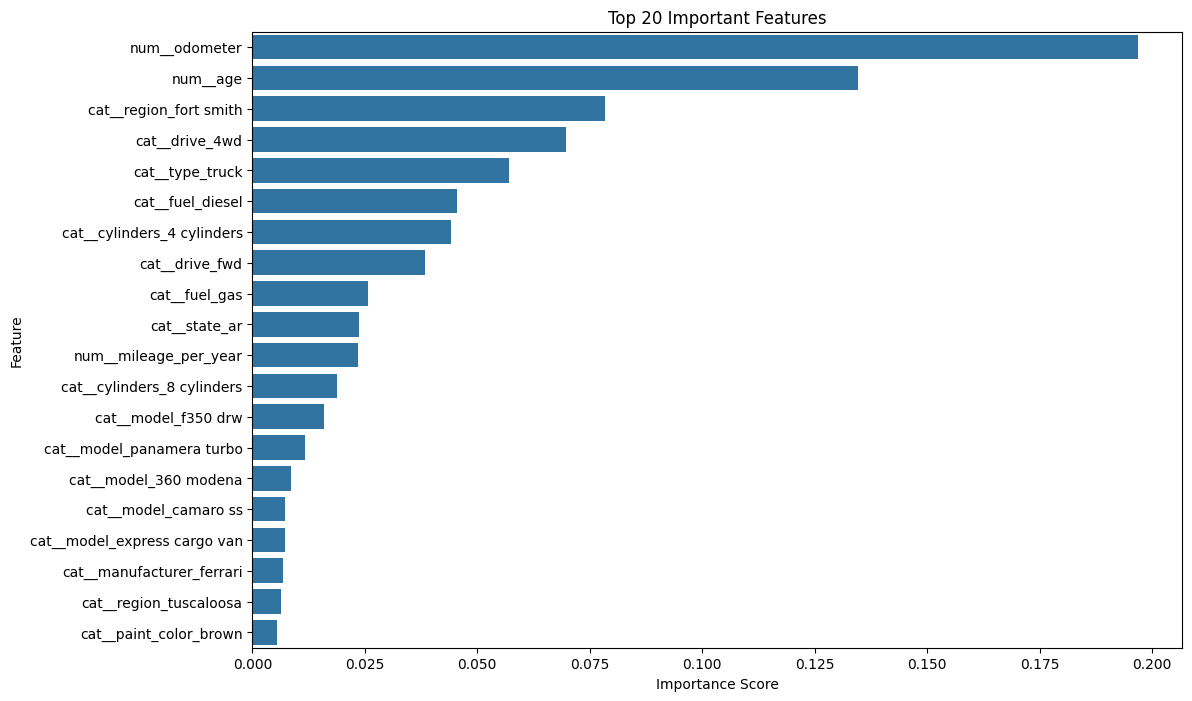

In [25]:
# Extract feature importances from the Random Forest model
feature_importances = best_rf_model.named_steps['regressor'].feature_importances_

# Extract feature names from the preprocessor
feature_names = best_rf_model.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 20 important features
print(importance_df.head(20))

# Plot the top 20 important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
